In [12]:
from analysis import AxonAstroAnalyzer, AxonAstroPlotter
from importlib import reload
AxonAstroAnalyzer = reload(AxonAstroAnalyzer)
AxonAstroPlotter = reload(AxonAstroPlotter)
from analysis.general_utils import aqua_utils, saving_utils, plotly_utils, general_utils, compare_astro_utils, correlation_utils, duration_utils, stat_utils
import numpy as np
import os, sys, glob
import plotly.offline as offline

analysis_pp = reload(analysis_pp)
aqua_utils = reload(aqua_utils)
plotly_utils = reload(plotly_utils)
saving_utils = reload(saving_utils)
duration_utils = reload(duration_utils)
compare_astro_utils = reload(compare_astro_utils)
correlation_utils = reload(correlation_utils)
stat_utils = reload(stat_utils)

In [3]:
output_folder = '/Users/achilleasgeorgiou/Desktop/data_output'
AA_plotter = AxonAstroPlotter.AxonAstroPlotter(output_folder)

In [4]:
base_path = '/Users/achilleasgeorgiou/Desktop/data_local/astro_axon/181022_003/'
day = '0'
#Take a look in axon_astro_landmarks, to determine number of axons and astro far to include
num_axons=3
num_astro_far=2
AA = AxonAstroAnalyzer.AxonAstroAnalyzer(base_path, day, num_axons=num_axons, num_astro_far=num_astro_far)

Running ind 11836 [0 1 2 3 4 5 6 7 8 9]
Rest ind 3157 [87 88 89 90 91 92 93 94 95 96]
Running exact ind 9739 [ 0  1  3  4  5  6  7  8  9 10]
Rest exact ind 5254 [ 2 65 69 70 72 73 74 75 76 77]
No stick ind 11754 [0 1 2 3 4 5 6 7 8 9]
Stick ind 3239 [20 21 22 23 24 25 26 27 28 29]
Stick exact start ind  202 [ 20  52 150 212 276 350 386 417 451 481]
Stick start ind 3030 [20 21 22 23 24 25 26 27 28 29]
Stick end ind 3030 [21 22 23 24 25 26 27 28 29 30]
Stick expect ind 3030 [ 5  6  7  8  9 10 11 12 13 14]
Stick rest ind 0 []
Running exact start ind 77 [   0  126  347  843 1143 1166 1273 1437 2125 3257]
Running start ind 77 [   0  126  347  843 1143 1166 1273 1437 2125 3257]
nrr ind 382 [  3  66  71 126 242 246 260 272 297 347]
rnr ind 383 [  2  65  69  72 241 244 248 271 296 317]
REMOVED stick_rest_no_run key
REMOVED stick_rest key
/Users/achilleasgeorgiou/Desktop/data_local/astro_axon/181022_003/day_0/aqua_no_bound/aqua_merged/merged.pkl
True
Filtered out events: FROM: 54326 TO: 25834
[a

In [6]:
#res_d (same applies as in AstrocyteExample.ipynb)
AA.res_d.keys()

dict_keys(['peri', 'area', 'circMetric', 'decayTau', 'dffMax', 'dffMax2', 'dffMaxFrame', 'dffMaxPval', 'dffMaxZ', 'fall91', 'rgt1', 'rise19', 'tBegin', 'tEnd', 'width11', 'width55', 'areaChange', 'areaChangeRate', 'areaFrame', 'propGrow', 'propGrowOverall', 'propShrink', 'propShrinkOverall', 't0', 't1', 'x2D', 'x3D', 'dff_raw', 'dff_only', 'd_raw', 'd_only', 'event_i_video_segment', 'time', 'time_s'])

#### Landmarks 

In [10]:
'''
axon_1 key, related to 
    axon_1_far : selected correlated axon outside of astrocyte bound
    astro_1_close_1: area close around axon_1 landmark 
    astro_1_close_2: area close around to axon_1 landmark but further than astro_1_close_1
'''
AA.compare_tuples

{'axon_1': {'axon': 'axon_1',
  'axon_far': 'axon_1_far',
  'close_1': 'astro_1_close_1',
  'close_2': 'astro_1_close_2',
  'far_1': 'astro_far_1',
  'far_2': 'astro_far_2'},
 'axon_2': {'axon': 'axon_2',
  'axon_far': 'axon_2_far',
  'close_1': 'astro_2_close_1',
  'close_2': 'astro_2_close_2',
  'far_1': 'astro_far_1',
  'far_2': 'astro_far_2'},
 'axon_3': {'axon': 'axon_3',
  'axon_far': 'axon_3_far',
  'close_1': 'astro_3_close_1',
  'close_2': 'astro_3_close_2',
  'far_1': 'astro_far_1',
  'far_2': 'astro_far_2'}}

Axon centroid coordinates {'axon_1': (327, 183), 'axon_2': (281, 272), 'axon_3': (166, 376)}


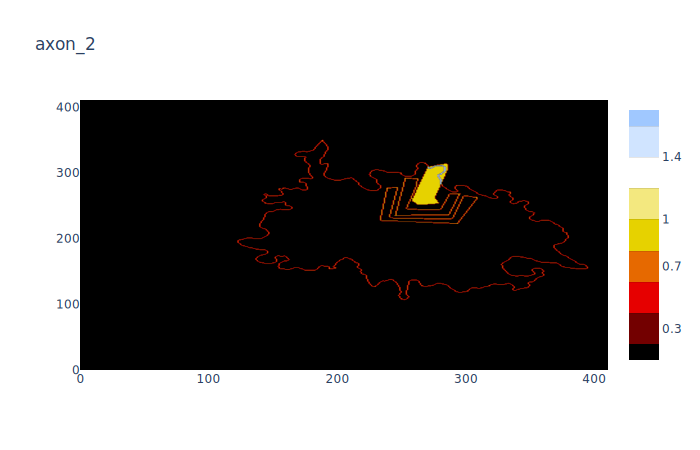

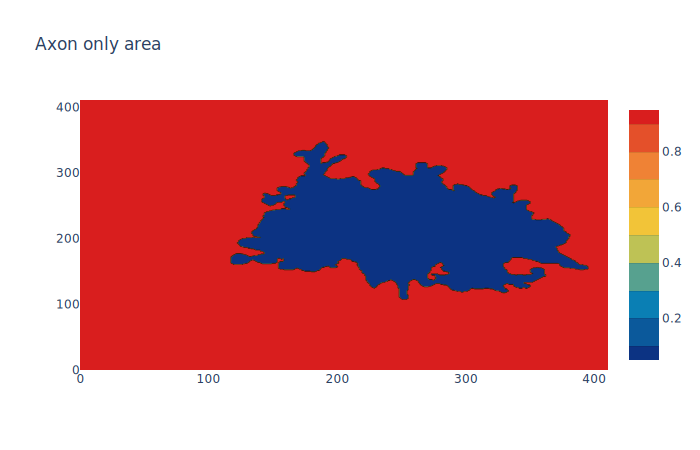

In [144]:
land_join = np.zeros((AA.input_shape[0], AA.input_shape[1]))

#Axon centroids
print('Axon centroid coordinates', AA.axon_centroids)

axon = 'axon_2'

#Location of axon, not just line border
land_join[AA.landmark_locs[axon]] = 1

#Include any to see difference
#land_join += AA.landmark_line_borders[AA.compare_tuples[axon]['axon']] * 2
#land_join += AA.landmark_line_borders[AA.compare_tuples[axon]['axon_far']] * 2
#land_join += AA.landmark_line_borders[AA.compare_tuples[axon]['far_1']] * 1
#land_join += AA.landmark_line_borders[AA.compare_tuples[axon]['far_2']] * 1
land_join += AA.landmark_line_borders[AA.compare_tuples[axon]['close_1']] * 1
land_join += AA.landmark_line_borders[AA.compare_tuples[axon]['close_2']] * 1
land_join += AA.landmark_line_borders['cell_bound'] * 0.8

plotly_utils.plot_contour(land_join, color_scale='Blackbody', title=axon).show('svg')
plotly_utils.plot_contour(AA.axon_only_bound, title='Axon only area').show('svg')

In [133]:
#Nested dictionaries, first key the
#Events contained within each landmark. This includes both astrocyte and axon
print(AA.events_contained.keys())
#Events contained outside the border (within axon boundary). Only axon
print(AA.axon_bound_events_contained.keys())

#Events contained within running in *axon_2_far landmark*
print(len(AA.events_contained['running']['axon_2_far']))
#AA.times_contained (frame start, frame end) for events in each landmark

#Events contained *outside border* while running
print(len(AA.axon_bound_events_contained['running']))

#Events contained in *astrocyte landmarks* only
print(len(AA.astro_landmark_bound_events_contained['running']))

dict_keys(['default', 'rest_exact', 'no_stick', 'stick', 'stick_exact_start', 'stick_start', 'stick_end', 'stick_expect', 'running', 'running_exact', 'running_semi_exact', 'running_start', 'running_exact_start', 'running_before', 'stick_run_ind_15', 'stick_run_ind_30', 'rest', 'rest_semi_exact', 'rest_start', 'rnr', 'nrr_ind', 'random_1', 'random_2', 'random_3'])
dict_keys(['default', 'rest_exact', 'no_stick', 'stick', 'stick_exact_start', 'stick_start', 'stick_end', 'stick_expect', 'running', 'running_exact', 'running_semi_exact', 'running_start', 'running_exact_start', 'running_before', 'stick_run_ind_15', 'stick_run_ind_30', 'rest', 'rest_semi_exact', 'rest_start', 'rnr', 'nrr_ind', 'random_1', 'random_2', 'random_3'])
495
13821
1173


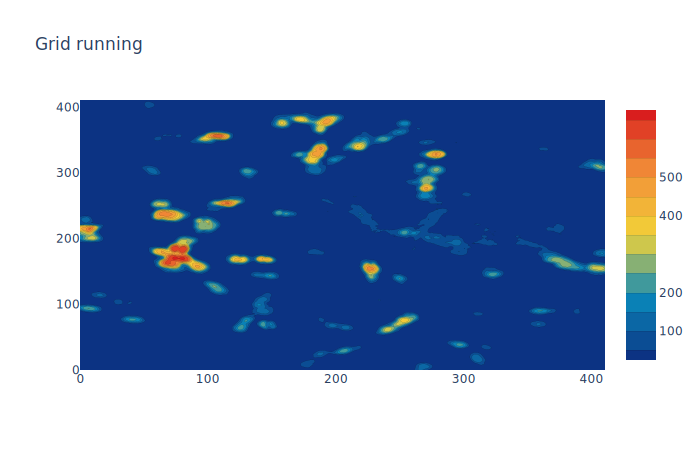

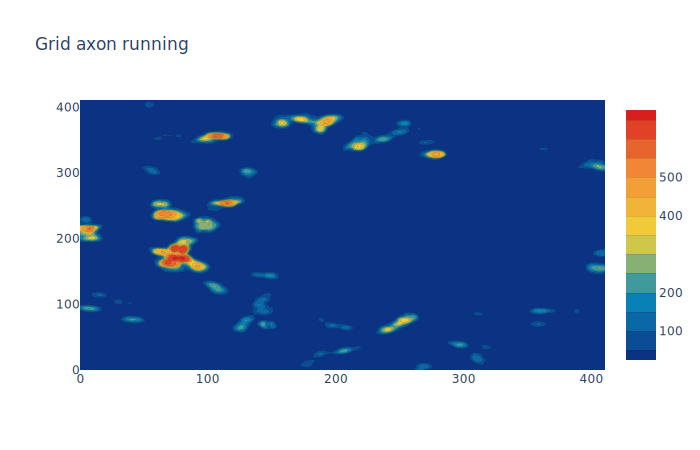

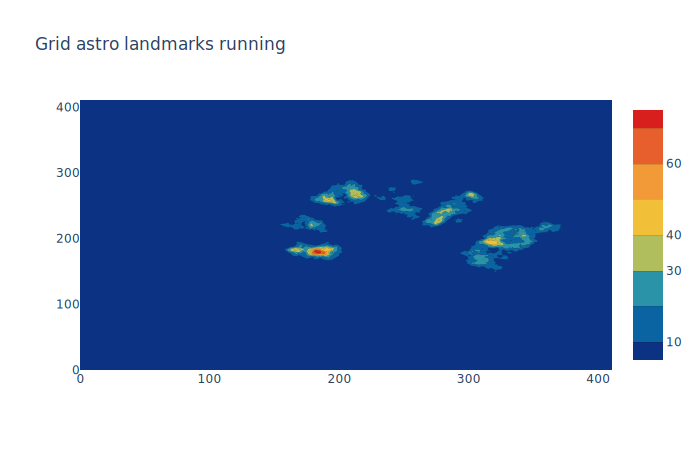

In [134]:
shape_2d = (AA.input_shape[0], AA.input_shape[1])
grid_running = aqua_utils.get_event_grid_from_x2D(AA.res_d['x2D'][AA.event_subsets['running']], shape_2d)
grid_axon_running = aqua_utils.get_event_grid_from_x2D(AA.res_d['x2D'][AA.axon_bound_events_contained['running']], shape_2d)
grid_astro_landmarks_running = aqua_utils.get_event_grid_from_x2D(AA.res_d['x2D'][AA.astro_landmark_bound_events_contained['running']], shape_2d)

plotly_utils.plot_contour(grid_running, title='Grid running').show('svg')
plotly_utils.plot_contour(grid_axon_running, title='Grid axon running').show('svg')
plotly_utils.plot_contour(grid_astro_landmarks_running, title='Grid astro landmarks running').show('svg')